In [2]:
# Creating Date List For Backtesting
import sys
sys.path.append(r'C:\Users\kocat_000\quantFinance\PycharmProjects')
import backtesting.utilities as bu
dates_output = bu.get_backtesting_dates(date_to=20210402,years_back=10)
double_dates = sorted(dates_output['double_dates'],reverse=False)
selected_dates = double_dates
double_dates = sorted(dates_output['double_dates_all'],reverse=False)
selected_dates = double_dates


In [ ]:
# Historical Spread Carry Report Run:

import opportunity_constructs.spread_carry as sc
import get_price.get_futures_price as gfp

futures_data_dictionary = {x: gfp.get_futures_price_preloaded(ticker_head=x) for x in sc.max_tr_dte_limits.keys()}

for date_to in selected_dates:
    print(date_to)
    sc.generate_spread_carry_sheet_4date(report_date=date_to,futures_data_dictionary=futures_data_dictionary)

In [36]:
import backtesting,backtest_spread_carry as bsc
spread_carry_backtest_results = bsc.backtest_spread_carry(date_list =selected_dates)
total_pnl_frame = spread_carry_backtest_results['total_pnl_frame']
big_data = spread_carry_backtest_results['big_data']

In [58]:
big_data.columns

Index(['ticker1', 'ticker2', 'ticker1L', 'ticker2L', 'tickerHead',
       'front_tr_dte', 'front_tr_dteL', 'carry', 'q_carry', 'q_carry_average',
       'q_carry_max', 'q_carry_min', 'butterfly_q', 'butterfly_z',
       'reward_risk', 'price', 'priceL', 'butterfly_q10', 'butterfly_q25',
       'butterfly_q35', 'butterfly_q50', 'butterfly_q65', 'butterfly_q75',
       'butterfly_q90', 'butterfly_mean', 'butterfly_noise', 'q', 'q5', 'q1',
       'upside', 'downside', 'upsideL', 'downsideL', 'change5', 'change10',
       'change20', 'q_carry_abs', 'pnl_long5', 'pnl_short5', 'pnl_final'],
      dtype='object')

In [ ]:
import backtesting.backtest_stats as bs
import pandas as pd
import numpy as np
from IPython.display import display

trade_data = big_data
trade_data = big_data[(big_data['tickerHead']!='CL')&(big_data['tickerHead']!='B')&(big_data['tickerHead']!='ED')]

rank_indicators_output = bs.rank_indicators(trade_data=trade_data,long_pnl_field ='pnl_long5',
                                            short_pnl_field ='pnl_short5',granular_ranking_type='ticker_head',
                                            indicator_list = ['q','q5','q1', 'q_carry','reward_risk'],strategy_class='spread_carry')
indicator_ranking_total = rank_indicators_output['indicator_ranking_total']
indicator_ranking_granular_total = rank_indicators_output['indicator_ranking_granular_total']
display(indicator_ranking_total)
display(indicator_ranking_granular_total)

In [37]:
import backtesting.backtest_stats as bs
import pandas as pd
import numpy as np
from IPython.display import display

trade_data = big_data[(big_data['tickerHead']=='ED')]
#trade_data = big_data[(big_data['tickerHead']=='CL')|(big_data['tickerHead']=='B')]
rank_indicators_output = bs.rank_indicators(trade_data=trade_data,long_pnl_field ='pnl_long5',
                                            short_pnl_field ='pnl_short5',granular_ranking_type='ticker_head',
                                            indicator_list = ['q','q5','q1','q_carry','reward_risk'],strategy_class='spread_carry')
indicator_ranking_total = rank_indicators_output['indicator_ranking_total']
indicator_ranking_granular_total = rank_indicators_output['indicator_ranking_granular_total']
display(indicator_ranking_total)
display(indicator_ranking_granular_total)

,indicator,ranking
0,q,42
9,"[q5, q]",42
24,"[reward_risk, q_carry]",41
3,q_carry,37
13,"[q1, q]",33
2,q1,28
10,"[q5, q1]",28
21,"[reward_risk, q]",28
7,"[q, q_carry]",27
22,"[reward_risk, q5]",27


,indicator,ranking
0,q,42
9,"[q5, q]",42
24,"[reward_risk, q_carry]",41
3,q_carry,37
13,"[q1, q]",33
2,q1,28
10,"[q5, q1]",28
21,"[reward_risk, q]",28
7,"[q, q_carry]",27
22,"[reward_risk, q5]",27


In [ ]:
# Best Indicator Combo For Seasonal Producs
import backtesting.backtest_stats as bs
from IPython.display import display
import numpy as np
trade_data = big_data
trade_data = big_data[(big_data['tickerHead']!='CL')&(big_data['tickerHead']!='B')&(big_data['tickerHead']!='ED')]
trade_data = trade_data[(np.isfinite(trade_data['q']))&(np.isfinite(trade_data['q_carry']))]
display(bs.get_indicator_rr_double_table(trade_data=trade_data,indicator_list=['q','q_carry'],strategy_class='spread_carry',
                                        long_pnl_field ='pnl_long5',
                                            short_pnl_field ='pnl_short5'))

display(bs.get_indicator_rr_double_table(trade_data=trade_data,indicator_list=['q1','q_carry'],strategy_class='spread_carry',
                                        long_pnl_field ='pnl_long5',
                                            short_pnl_field ='pnl_short5'))

display(bs.get_indicator_rr_table(trade_data=trade_data,indicator_name='q',strategy_class='spread_carry',long_pnl_field ='pnl_long5',
                                            short_pnl_field ='pnl_short5'))

display(bs.get_indicator_rr_table(trade_data=trade_data,indicator_name='q1',strategy_class='spread_carry',long_pnl_field ='pnl_long5',
                                            short_pnl_field ='pnl_short5'))

In [45]:
# Best Indicator Combo For NON Seasonal Producs
import backtesting.backtest_stats as bs
from IPython.display import display
import numpy as np
trade_data = big_data
#trade_data = trade_data[(trade_data['tickerHead']=='CL')|(trade_data['tickerHead']=='B')]
trade_data = trade_data[(trade_data['tickerHead']=='ED')]
trade_data = trade_data[(np.isfinite(trade_data['q']))&(np.isfinite(trade_data['q_carry']))]
display(bs.get_indicator_rr_double_table(trade_data=trade_data,indicator_list=['reward_risk','q_carry'],
                                         strategy_class='spread_carry',
                                        long_pnl_field ='pnl_long5',
                                            short_pnl_field ='pnl_short5'))
display(bs.get_indicator_rr_double_table(trade_data=trade_data,indicator_list=['q_carry','reward_risk'],strategy_class='spread_carry',
                                 long_pnl_field ='pnl_long5',
                                            short_pnl_field ='pnl_short5'))




,indicator1_ulimit,indicator2_ulimit,mean_pnl,reward_risk
0,NaN,NaN,49.915136,0.174703
1,NaN,11.0,-30.717969,-0.092154
2,NaN,6.0,-41.003745,-0.111932
3,0.01,NaN,-32.216797,-0.116786
4,0.01,2.0,-6.248696,-0.024995
5,0.01,-1.0,-9.498859,-0.033246
6,-0.04,NaN,5.689547,0.017069
7,-0.04,-3.0,-1.290625,-0.003872
8,-0.04,-8.0,49.308257,0.147925


,indicator1_ulimit,indicator2_ulimit,mean_pnl,reward_risk
0,NaN,NaN,19.133683,0.047834
1,NaN,0.10,-12.197904,-0.041697
2,NaN,0.03,-25.734914,-0.090072
3,3.0,NaN,-50.780235,-0.152341
4,3.0,0.00,-10.023453,-0.040094
5,3.0,-0.03,4.478095,0.013588
6,-2.0,NaN,15.377828,0.069200
7,-2.0,-0.04,37.236003,0.130326
8,-2.0,-0.10,4.071200,0.010178


In [42]:
# Best Indicator Combo For NON Seasonal Producs
import backtesting.backtest_stats as bs
from IPython.display import display
import numpy as np
trade_data = big_data
trade_data = trade_data[(trade_data['tickerHead']=='ED')]
trade_data = trade_data[(np.isfinite(trade_data['q']))&(np.isfinite(trade_data['q_carry']))]
display(bs.get_indicator_rr_double_table(trade_data=trade_data,indicator_list=['q5','q'],strategy_class='spread_carry'
                                        ,long_pnl_field ='pnl_long5',
                                            short_pnl_field ='pnl_short5'))
display(bs.get_indicator_rr_table(trade_data=trade_data,indicator_name='q',strategy_class='spread_carry',
                                 long_pnl_field ='pnl_long5',
                                            short_pnl_field ='pnl_short5'))

,indicator1_ulimit,indicator2_ulimit,mean_pnl,reward_risk
0,19.0,6.0,5.566201,0.016699
1,19.0,24.0,-9.044194,-0.031655
2,19.0,NaN,1.222052,0.004888
3,43.0,29.0,9.725375,0.029176
4,43.0,39.0,-14.565164,-0.058261
5,43.0,NaN,-31.233876,-0.093218
6,NaN,54.0,-11.169419,-0.028232
7,NaN,69.0,22.039313,0.055847
8,NaN,NaN,107.903573,0.431614


,indicator_ulimit,mean_pnl,reward_risk
0,6.0,5.566201,0.016699
1,15.0,-12.719566,-0.034979
2,24.0,17.633705,0.061718
3,31.0,20.683199,0.093074
4,38.0,-13.377036,-0.050164
5,45.0,18.160135,0.071451
6,55.0,11.004054,0.033012
7,69.0,17.672936,0.044182
8,NaN,107.903573,0.431614


In [ ]:
# impact of q_carry_max<=3 requirement on short trades: SIGNIFICANT
# impact of q_carry_average<=-7 on short trades: SIGNIFICANT
# impact of q_carry_min>=-5 requirement on long trades: NOT SIGNIFICANT
# impact of q_carry_average>=15 on long trades: NOT SIGNIFICANT


filtered_data = big_data[(big_data['tickerHead']!='CL')&(big_data['tickerHead']!='B')&(big_data['tickerHead']!='ED')]
filtered_data1 = filtered_data[(filtered_data['q']>=70)&(filtered_data['q_carry']<=-9)]

print('SHORT TRADES')
print('Mean Pnl: ' + str(filtered_data1['pnl_short5'].mean()))
print('Total Pnl: ' + str(filtered_data1['pnl_short5'].sum()))
print('Mean Bad Loss: ' + str(filtered_data1['pnl_short5'].quantile(0.01)))
print('Reward Risk: ' + str(filtered_data1['pnl_short5'].mean()/filtered_data1['pnl_short5'].quantile(0.01)))

filtered_data2 = filtered_data[(filtered_data['q']>=70)&(filtered_data['q_carry']<=-9)&(filtered_data['q_carry_max']<=3)]

print(30*'-')
print('q_carry_max<=3 for SHORT TRADES')
print('Mean Pnl: ' + str(filtered_data2['pnl_short5'].mean()))
print('Total Pnl: ' + str(filtered_data2['pnl_short5'].sum()))
print('Mean Bad Loss: ' + str(filtered_data2['pnl_short5'].quantile(0.01)))
print('Reward Risk: ' + str(filtered_data2['pnl_short5'].mean()/filtered_data2['pnl_short5'].quantile(0.01)))

filtered_data2 = filtered_data[(filtered_data['q']>=70)&(filtered_data['q_carry']<=-9)&
                               (filtered_data['q_carry_average']<=-7)]

print(30*'-')
print('q_carry_max<=-7 for SHORT TRADES')
print('Mean Pnl: ' + str(filtered_data2['pnl_short5'].mean()))
print('Total Pnl: ' + str(filtered_data2['pnl_short5'].sum()))
print('Mean Bad Loss: ' + str(filtered_data2['pnl_short5'].quantile(0.01)))
print('Reward Risk: ' + str(filtered_data2['pnl_short5'].mean()/filtered_data2['pnl_short5'].quantile(0.01)))




filtered_data2 = filtered_data[(filtered_data['q']>=70)&(filtered_data['q_carry']<=-9)&
                               (filtered_data['q_carry_average']<=-7)&(filtered_data['q_carry_max']<=3)]

print(30*'-')
print('q_carry_max<=3 and q_carry_max<=-7 for SHORT TRADES')
print('Mean Pnl: ' + str(filtered_data2['pnl_short5'].mean()))
print('Total Pnl: ' + str(filtered_data2['pnl_short5'].sum()))
print('Mean Bad Loss: ' + str(filtered_data2['pnl_short5'].quantile(0.01)))
print('Reward Risk: ' + str(filtered_data2['pnl_short5'].mean()/filtered_data2['pnl_short5'].quantile(0.01)))

print(30*'-')
print(30*'-')
filtered_data1 = filtered_data[(filtered_data['q']<=38)&(filtered_data['q_carry']>=19)]
print('LONG TRADES')
print('Mean Pnl: ' + str(filtered_data1['pnl_long5'].mean()))
print('Total Pnl: ' + str(filtered_data1['pnl_long5'].sum()))
print('Mean Bad Loss: ' + str(filtered_data1['pnl_long5'].quantile(0.01)))
print('Reward Risk: ' + str(filtered_data1['pnl_long5'].mean()/filtered_data1['pnl_long5'].quantile(0.01)))

print(30*'-')
filtered_data1 = filtered_data[(filtered_data['q']<=38)&(filtered_data['q_carry']>=19)&(filtered_data['q_carry_min']>=-5)]
print('LONG TRADES with q_carry_min>=-5')
print('Mean Pnl: ' + str(filtered_data1['pnl_long5'].mean()))
print('Total Pnl: ' + str(filtered_data1['pnl_long5'].sum()))
print('Mean Bad Loss: ' + str(filtered_data1['pnl_long5'].quantile(0.01)))
print('Reward Risk: ' + str(filtered_data1['pnl_long5'].mean()/filtered_data1['pnl_long5'].quantile(0.01)))


print(30*'-')
filtered_data1 = filtered_data[(filtered_data['q']<=38)&(filtered_data['q_carry']>=19)&
                               (filtered_data['q_carry_average']>=15)]
print('LONG TRADES with q_carry_average>=15')
print('Mean Pnl: ' + str(filtered_data1['pnl_long5'].mean()))
print('Total Pnl: ' + str(filtered_data1['pnl_long5'].sum()))
print('Mean Bad Loss: ' + str(filtered_data1['pnl_long5'].quantile(0.01)))
print('Reward Risk: ' + str(filtered_data1['pnl_long5'].mean()/filtered_data1['pnl_long5'].quantile(0.01)))

print(30*'-')
filtered_data1 = filtered_data[(filtered_data['q']<=38)&(filtered_data['q_carry']>=19)&
                               (filtered_data['q_carry_average']>=15)&(filtered_data['q_carry_min']>=-5)]
print('LONG TRADES with q_carry_average>=15 and q_carry_min>=-5')
print('Mean Pnl: ' + str(filtered_data1['pnl_long5'].mean()))
print('Total Pnl: ' + str(filtered_data1['pnl_long5'].sum()))
print('Mean Bad Loss: ' + str(filtered_data1['pnl_long5'].quantile(0.01)))
print('Reward Risk: ' + str(filtered_data1['pnl_long5'].mean()/filtered_data1['pnl_long5'].quantile(0.01)))

In [ ]:
import backtesting,backtest_spread_carry as bsc
total_pnl_frame = bsc.construct_spread_portfolio(date_list=selected_dates)

In [ ]:
select_frame = trade_data[(trade_data['tickerHead']=='ED')&(trade_data['q']>69)]
select_frame

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(len(select_frame)),select_frame['pnl_short5'].cumsum())
plt.grid()
plt.show()

In [ ]:
import backtesting.backtest_spread_carry as bcs
import my_sql_routines.my_sql_utilities as msu
con = msu.get_my_sql_connection()
output = bcs.construct_daily_position(trade_date=20140910,con=con,portfolio_id=1,rule_no=2)
output

In [7]:
# 1: 28 Cal Days Holding, no other trade management with very liberal position selection criteria to explore
# signal effectives
# 2: Similar to #1 with 14 Cal Days Holding
# 3,4,5: 28 Cal Days Holding, with tickerhead and tickergroup based risk management
# 6,7,8: 14 Cal Days Holding, with tickerhead and tickergroup based risk management

# 9, 10, 11: Select based on filter rule 3, tickerhead and tickergroup risk management, 28cal days holing
# 12,13,14: Select based on filter rule 3, tickerhead and tickergroup risk management, 14cal days holing
# 15,16,17: Filter rule 3, CL,B trade management, 28 cal days max hold
# 15,16,17: Filter rule 3, CL,B trade management, 28 cal days max hold


import my_sql_routines.my_sql_utilities as msu
import backtesting.backtest_spread_carry as bcs
con = msu.get_my_sql_connection()
for date_to in selected_dates[1:]:
    print(date_to)
    bcs.construct_daily_position(trade_date=date_to,con=con,max_holding_period=14,
                                 risk_managementQ=True,position_managementQ=False,portfolio_id=14,rule_no=3)

20110406
20110407
20110408
20110411
20110412
20110413
20110414
20110415
20110418
20110419
20110420
20110421
20110425
20110426
20110427
20110428
20110429
20110502
20110503
20110504
20110505
20110506
20110509
20110510
20110511
20110512
20110513
20110516
20110517
20110518
20110519
20110520
20110523
20110524
20110525
20110526
20110527
20110531
20110601
20110602
20110603
20110606
20110607
20110608
20110609
20110610
20110613
20110614
20110615
20110616
20110617
20110620
20110621
20110622
20110623
20110624
20110627
20110628
20110629
20110630
20110701
20110705
20110706
20110707
20110708
20110711
20110712
20110713
20110714
20110715
20110718
20110719
20110720
20110721
20110722
20110725
20110726
20110727
20110728
20110729
20110801
20110802
20110803
20110804
20110805
20110808
20110809
20110810
20110811
20110812
20110815
20110816
20110817
20110818
20110819
20110822
20110823
20110824
20110825
20110826
20110829
20110830
20110831
20110901
20110902
20110906
20110907
20110908
20110909
20110912
20110913
2

20141114
20141117
20141118
20141119
20141120
20141121
20141124
20141125
20141126
20141128
20141201
20141202
20141203
20141204
20141205
20141208
20141209
20141210
20141211
20141212
20141215
20141216
20141217
20141218
20141219
20141222
20141223
20141224
20141226
20141229
20141230
20141231
20150102
20150105
20150106
20150107
20150108
20150109
20150112
20150113
20150114
20150115
20150116
20150120
20150121
20150122
20150123
20150126
20150127
20150128
20150129
20150130
20150202
20150203
20150204
20150205
20150206
20150209
20150210
20150211
20150212
20150213
20150217
20150218
20150219
20150220
20150223
20150224
20150225
20150226
20150227
20150302
20150303
20150304
20150305
20150306
20150309
20150310
20150311
20150312
20150313
20150316
20150317
20150318
20150319
20150320
20150323
20150324
20150325
20150326
20150327
20150330
20150331
20150401
20150402
20150406
20150407
20150408
20150409
20150410
20150413
20150414
20150415
20150416
20150417
20150420
20150421
20150422
20150423
20150424
20150427
2

20180629
20180702
20180703
20180705
20180706
20180709
20180710
20180711
20180712
20180713
20180716
20180717
20180718
20180719
20180720
20180723
20180724
20180725
20180726
20180727
20180730
20180731
20180801
20180802
20180803
20180806
20180807
20180808
20180809
20180810
20180813
20180814
20180815
20180816
20180817
20180820
20180821
20180822
20180823
20180824
20180827
20180828
20180829
20180830
20180831
20180904
20180905
20180906
20180907
20180910
20180911
20180912
20180913
20180914
20180917
20180918
20180919
20180920
20180921
20180924
20180925
20180926
20180927
20180928
20181001
20181002
20181003
20181004
20181005
20181008
20181009
20181010
20181011
20181012
20181015
20181016
20181017
20181018
20181019
20181022
20181023
20181024
20181025
20181026
20181029
20181030
20181031
20181101
20181102
20181105
20181106
20181107
20181108
20181109
20181112
20181113
20181114
20181115
20181116
20181119
20181120
20181121
20181123
20181126
20181127
20181128
20181129
20181130
20181203
20181204
20181205
2

In [8]:
# Collect Results to Build Time Series of Realistic Portfolio: Case of All Trades (no risk management)

import ta.strategy as ts
import pandas as pd

position_frame_list  =[]
portfolio_id = 2

for date_to in selected_dates[1:]:
    trade_date_folder = ts.create_strategy_output_dir(strategy_class='spread_carry', report_date=date_to)
    position_frame_list.append(pd.read_pickle(trade_date_folder + '/portfolio_' + str(portfolio_id) +'.pkl'))
    position_frame_list[-1]['settle_date'] = date_to

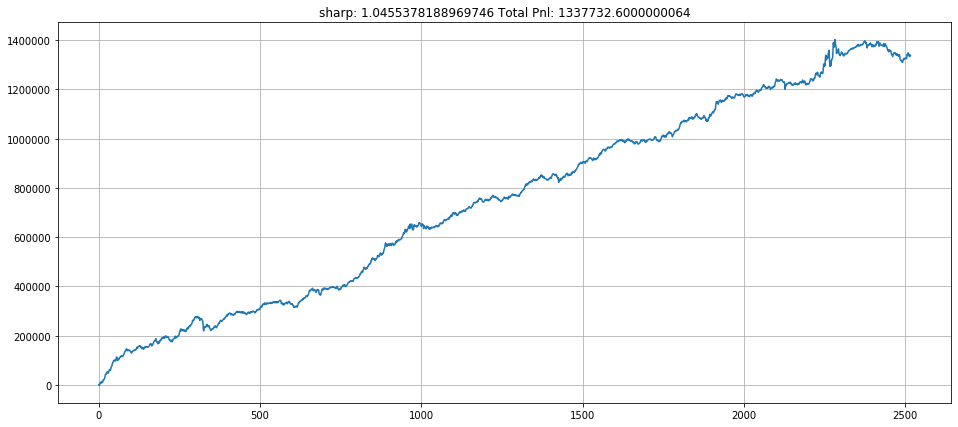

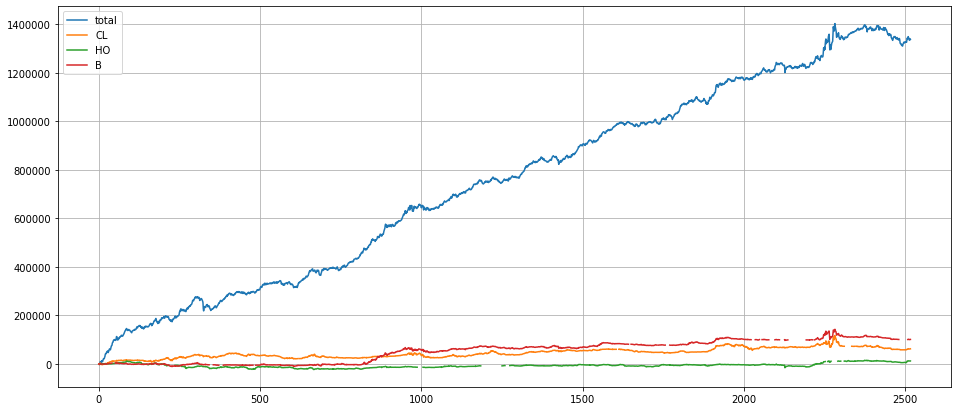

In [9]:
# Analyzing Sharp Ratios and Portfolio Time Series For Realistic Portfolio

position_frame_merged = pd.concat(position_frame_list)
daily_data = pd.DataFrame()
grouped = position_frame_merged.groupby('settle_date')
daily_data['pnl'] = grouped['pnl'].sum()

import math as m
import pandas as pd

sharp = m.sqrt(52)*daily_data['pnl'].mean()/daily_data['pnl'].std()


%matplotlib inline
import matplotlib.pyplot as plt
#trade_data=big_data
plt.figure(figsize=(16,7))
plt.plot(range(len(daily_data)),daily_data['pnl'].cumsum())
plt.grid()
plt.title('sharp: ' + str(sharp) + 
          ' Total Pnl: ' + str(daily_data['pnl'].sum()))
plt.show()

ticker_head_list = ['CL','HO','B']

for i in range(len(ticker_head_list)):
    select_frame = position_frame_merged[position_frame_merged['ticker_head']==ticker_head_list[i]]
    daily_data_select = pd.DataFrame()
    grouped = select_frame.groupby('settle_date')
    daily_data_select['pnl_' + ticker_head_list[i]] = grouped['pnl'].sum()
    daily_data = daily_data.merge(daily_data_select,how='outer',left_index=True,right_index=True)
    

plt.figure(figsize=(16,7))
plt.plot(range(len(daily_data)),daily_data['pnl'].cumsum(),
         range(len(daily_data)),daily_data['pnl_' + ticker_head_list[0]].cumsum(),
         range(len(daily_data)),daily_data['pnl_' + ticker_head_list[1]].cumsum(),
         range(len(daily_data)),daily_data['pnl_' + ticker_head_list[2]].cumsum())
plt.legend(['total'] + ticker_head_list)
plt.grid()

In [10]:
# Does splitting bets between CL and B provide diversification benefits?

import math as m
import numpy as np


position_frame_merged = pd.concat(position_frame_list)
select_frame = position_frame_merged[position_frame_merged['ticker_head']=='CL']
grouped = select_frame.groupby('settle_date')
daily_data_select = pd.DataFrame()
daily_data_select['pnl'] = grouped['pnl'].sum()
sharp = m.sqrt(52)*daily_data_select['pnl'].mean()/daily_data_select['pnl'].std()

print('CL only Total Pnl: ' + str(daily_data_select['pnl'].sum()) + ', Sharp: ' + str(sharp))

select_frame = position_frame_merged[position_frame_merged['ticker_head']=='B']
grouped = select_frame.groupby('settle_date')
daily_data_select = pd.DataFrame()
daily_data_select['pnl'] = grouped['pnl'].sum()
sharp = m.sqrt(52)*daily_data_select['pnl'].mean()/daily_data_select['pnl'].std()

print('B only Total Pnl: ' + str(daily_data_select['pnl'].sum()) + ', Sharp: ' + str(sharp))

select_frame = position_frame_merged[(position_frame_merged['ticker_head']=='B')|
                                     (position_frame_merged['ticker_head']=='CL')]
grouped = select_frame.groupby('settle_date')
daily_data_select = pd.DataFrame()
daily_data_select['pnl'] = grouped['pnl'].sum()
sharp = m.sqrt(52)*daily_data_select['pnl'].mean()/daily_data_select['pnl'].std()

print('B only Total Pnl: ' + str(daily_data_select['pnl'].sum()) + ', Sharp: ' + str(sharp))


select_frame = position_frame_merged[position_frame_merged['ticker_head']=='CL']
daily_data_CL = pd.DataFrame()
grouped = select_frame.groupby('settle_date')
daily_data_CL['pnl_CL'] = grouped['pnl'].sum()

select_frame = position_frame_merged[position_frame_merged['ticker_head']=='B']
daily_data_B = pd.DataFrame()
grouped = select_frame.groupby('settle_date')
daily_data_B['pnl_B'] = grouped['pnl'].sum()


daily_data = daily_data_CL.merge(daily_data_B,how='outer',left_index=True,right_index=True)
daily_data.fillna(0,inplace=True)

r = np.corrcoef(daily_data['pnl_CL'], daily_data['pnl_B'])
r

CL only Total Pnl: 62649.99999999943, Sharp: 0.1437611963123012
B only Total Pnl: 101320.00000000096, Sharp: 0.24942171989366704
B only Total Pnl: 163970.0000000004, Sharp: 0.20550938812864192


array([[1.        , 0.69658759],
       [0.69658759, 1.        ]])

In [ ]:
# Sources of PNL By Tickerhead

ticker_head_summary = pd.DataFrame()
grouped = position_frame_merged.groupby('ticker_head')
ticker_head_summary['pnl'] = grouped['pnl'].sum()
ticker_head_summary['num_trades'] = grouped['pnl'].count()
ticker_head_summary.sort_values('pnl')

In [35]:
# Collecting Closed Trades

import ta.strategy as ts
import pandas as pd
closed_trade_list  =[]


for date_to in selected_dates[1:]:
    #print(date_to)
    trade_date_folder = ts.create_strategy_output_dir(strategy_class='spread_carry', report_date=date_to)
    closed_trade_list.append(pd.read_pickle(trade_date_folder + '/closed_positions_' + str(2) + '.pkl'))
    

trade_history_frame = pd.concat(closed_trade_list)    


print('Mean Pnl: ' + str(trade_history_frame['pnl_total'].mean()))
print('Risk Reward: ' + str(trade_history_frame['pnl_total'].mean()/-trade_history_frame['pnl_total'].quantile(0.2)))
print('Mean Bad Loss: ' + str(trade_history_frame['pnl_total'].quantile(0.01)))

Mean Pnl: 109.99463858305424
Risk Reward: 0.2618919966263195
Mean Bad Loss: -2308.375


In [15]:
# ED Signal Analysis With For Simulated Portfolios

select_frame = trade_history_frame[trade_history_frame['ticker_head']=='ED']

print('Mean Pnl: ' + str(select_frame['pnl_total'].mean()))
print('Num Trades: ' + str(len(select_frame)))
print('Mean Bad Loss: ' + str(select_frame['pnl_total'].quantile(0.01)))

print(30*'-')
print('ED Results with reward_risk<=-0.06 and q_initial>30 and front_tr_dte>=350')
select_frame2 =select_frame[(select_frame['reward_risk_initial']<=-0.06)&
                            (select_frame['q_inital']>=30)&
                           (select_frame['front_tr_dte_initial']>=350)]
print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

print(30*'-')
print('ED Results with only q>=69')
select_frame2 =select_frame[(select_frame['q_inital']>=69)]
print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

print(30*'-')
print('ED Results with q>=69 and reward_risk<=-0.06')
select_frame2 =select_frame[(select_frame['reward_risk_initial']<=-0.06)&(select_frame['q_inital']>=69)]
print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))


print(30*'-')
print('ED Results with only q>=69 and front_tr_dte>=350')
select_frame2 =select_frame[(select_frame['q_inital']>=69)&(select_frame['front_tr_dte_initial']>=350)]
print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))


Mean Pnl: 78.50694444445607
Num Trades: 720
Mean Bad Loss: -2693.625000000227
------------------------------
ED Results with reward_risk<=-0.06 and q_initial>30 and front_tr_dte>=350
Mean Pnl: 12.500000000023443
Total Pnl: 1912.5000000035907
Risk Reward: 0.020833333333373588
Num Trades: 153
Mean Bad Loss: -3549.0000000004984
------------------------------
ED Results with only q>=69
Mean Pnl: 202.7836134453877
Total Pnl: 48262.500000002256
Risk Reward: 0.7373949579832697
Num Trades: 238
Mean Bad Loss: -1618.1250000001928
------------------------------
ED Results with q>=69 and reward_risk<=-0.06
Mean Pnl: 349.40476190477165
Total Pnl: 22012.500000000622
Risk Reward: 1.2705627705639615
Num Trades: 63
Mean Bad Loss: -1699.5000000002847
------------------------------
ED Results with only q>=69 and front_tr_dte>=350
Mean Pnl: 129.1666666666638
Total Pnl: 19762.499999999574
Risk Reward: 0.4305555555553257
Num Trades: 153
Mean Bad Loss: -1849.5000000000703


In [27]:
# CL & B Signal Analysis With For Simulated Portofolios

print(30*'-')
print('CL Results with reward_risk<=-0.06 and q_initial>30')
select_frame = trade_history_frame[trade_history_frame['ticker_head']=='CL']
select_frame2 =select_frame[(select_frame['reward_risk_initial']<=-0.06)&
                            (select_frame['q_inital']>=30)
                           &(select_frame['front_tr_dteL_initial']>=25)]
print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

print(30*'-')
print('CL Results with reward_risk<=-0.11 and q_carry_initial<-1')
select_frame = trade_history_frame[trade_history_frame['ticker_head']=='CL']
select_frame2 =select_frame[(select_frame['reward_risk_initial']<=-0.11)&
                            (select_frame['q_carry_initial']<=-1)&
                           (select_frame['front_tr_dteL_initial']>=25)]
print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

print(30*'-')
print('CL and B Results with reward_risk<=-0.11 and q_carry_initial<-1')
select_frame = trade_history_frame[(trade_history_frame['ticker_head']=='CL')|(trade_history_frame['ticker_head']=='B')]
select_frame2 =select_frame[(select_frame['reward_risk_initial']<=-0.11)&
                            (select_frame['q_carry_initial']<=-1)
                           &(select_frame['front_tr_dteL_initial']>=25)]
print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

------------------------------
CL Results with reward_risk<=-0.06 and q_initial>30
Mean Pnl: 132.48968363136044
Total Pnl: 96319.99999999892
Risk Reward: 0.24535126598399729
Num Trades: 727
Mean Bad Loss: -1829.5999999999715
------------------------------
CL Results with reward_risk<=-0.11 and q_carry_initial<-1
Mean Pnl: 180.24523160762783
Total Pnl: 66149.99999999939
Risk Reward: 0.3004087193460364
Num Trades: 367
Mean Bad Loss: -1630.2000000000098
------------------------------
CL and B Results with reward_risk<=-0.11 and q_carry_initial<-1
Mean Pnl: 217.66025641025627
Total Pnl: 135820.0
Risk Reward: 0.40011076546003005
Num Trades: 624
Mean Bad Loss: -1643.0999999999976


In [32]:
# Seasonal Products Short Signal Analysis For Simulated Portfolios

print(30*'-')
print('Seasonal Products Short Original Filter Results Q>=30, q_carry_max<=3,'+ 
      'q_carry<=-9, q_carry_average<=-7, front_tr_dteL>=25')
select_frame = trade_history_frame[(trade_history_frame['ticker_head']!='CL')&
                                    (trade_history_frame['ticker_head']!='B')&
                                    (trade_history_frame['ticker_head']!='ED')]

select_frame2 = select_frame[(select_frame['q_inital']>=30)&
                             (select_frame['q_carry_max_initial']<=3)&
                             (select_frame['q_carry_initial']<=-9)&
                             (select_frame['q_carry_average_initial']<=-7)&
                             (select_frame['front_tr_dteL_initial']>=25)]

print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

select_frame2 = select_frame[(select_frame['q1_inital']>=65)&
                             (select_frame['q_carry_initial']<=-7)&
                             (select_frame['front_tr_dteL_initial']>=25)]

print(30*'-')
print('Seasonal Products Short Filter Results Q1>=65, q_carry<=-7, front_tr_dteL>=25')
print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

------------------------------
Seasonal Products Short Original Filter Results Q>=30, q_carry_max<=3,q_carry<=-9, q_carry_average<=-7, front_tr_dteL>=25
Mean Pnl: 163.00978533593536
Total Pnl: 584716.1000000008
Risk Reward: 0.45280495926648856
Num Trades: 3587
Mean Bad Loss: -2626.176000000001
------------------------------
Seasonal Products Short Filter Results Q1>=65, q_carry<=-7, front_tr_dteL>=25
Mean Pnl: 189.0081587083466
Total Pnl: 550202.7499999972
Risk Reward: 0.5113857107909857
Num Trades: 2911
Mean Bad Loss: -2872.2600000000075


In [36]:
# Seasonal Products Long Signal Analysis For Simulated Portfolios

print(30*'-')
print('Seasonal Products Long Original Filter Results Q<=70, q_carry_min>=-5,'+ 
      'q_carry>=19, q_carry_average>=15, front_tr_dteL>=25')
select_frame = trade_history_frame[(trade_history_frame['ticker_head']!='CL')&
                                    (trade_history_frame['ticker_head']!='B')&
                                    (trade_history_frame['ticker_head']!='ED')]

select_frame2 = select_frame[(select_frame['q_inital']<=70)&
                             (select_frame['q_carry_min_initial']>=-5)&
                             (select_frame['q_carry_initial']>=19)&
                             (select_frame['q_carry_average_initial']>=15)&
                             (select_frame['front_tr_dteL_initial']>=25)]

print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

select_frame2 = select_frame[(select_frame['q1_inital']<=31)&
                             (select_frame['q_carry_initial']>=19)&
                             (select_frame['front_tr_dteL_initial']>=25)]

print(30*'-')
print('Seasonal Products Short Filter Results Q1<=31, q_carry>=19, front_tr_dteL>=25')
print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

------------------------------
Seasonal Products Long Original Filter Results Q<=70, q_carry_min>=-5,q_carry>=19, q_carry_average>=15, front_tr_dteL>=25
Mean Pnl: 109.83997474747454
Total Pnl: 217483.14999999947
Risk Reward: 0.323020746816449
Num Trades: 1980
Mean Bad Loss: -1902.6250000000064
------------------------------
Seasonal Products Short Filter Results Q1<=31, q_carry>=19, front_tr_dteL>=25
Mean Pnl: 140.7332959641261
Total Pnl: 188301.15000000087
Risk Reward: 0.43516789104556564
Num Trades: 1338
Mean Bad Loss: -1955.024999999866


In [11]:
# Collect Results to Build Time Series of Realistic Portfolio

portfolio_id_list = [6,7,8]

from typing import Any

import contract_utilities.expiration as exp
import opportunity_constructs.futures_butterfly as fb
import signals.futures_filters as sf
import signals.futures_signals as fs
import ta.strategy as ts
import contract_utilities.contract_meta_info as cmi
import shared.calendar_utilities as cu
import contract_utilities.contract_meta_info as cmi
import get_price.get_futures_price as gfp
import os.path
import pandas as pd
import numpy as np
import random as rnd

position_frame_list1  =[]
position_frame_list2  =[]
position_frame_list3  =[]

for date_to in selected_dates[1:]:
    #print(date_to)
    trade_date_folder = ts.create_strategy_output_dir(strategy_class='spread_carry', report_date=date_to)
    position_frame_list1.append(pd.read_pickle(trade_date_folder + '/portfolio_' + str(portfolio_id_list[0]) +'.pkl'))
    position_frame_list2.append(pd.read_pickle(trade_date_folder + '/portfolio_' + str(portfolio_id_list[1]) +'.pkl'))
    position_frame_list3.append(pd.read_pickle(trade_date_folder + '/portfolio_' + str(portfolio_id_list[2]) +'.pkl'))
    position_frame_list1[-1]['settle_date'] = date_to
    position_frame_list2[-1]['settle_date'] = date_to
    position_frame_list3[-1]['settle_date'] = date_to

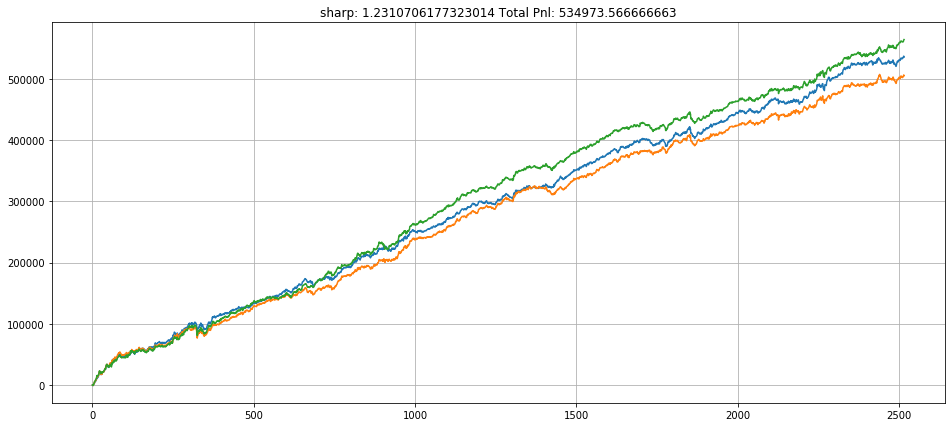

In [12]:
# Analyzing Sharp Ratios and Portfolio Time Series For Realistic Portfolio

position_frame_merged = pd.concat(position_frame_list1)
daily_data1 = pd.DataFrame()
grouped = position_frame_merged.groupby('settle_date')
daily_data1['pnl'] = grouped['pnl'].sum()

position_frame_merged = pd.concat(position_frame_list2)
daily_data2 = pd.DataFrame()
grouped = position_frame_merged.groupby('settle_date')
daily_data2['pnl'] = grouped['pnl'].sum()

position_frame_merged = pd.concat(position_frame_list3)
daily_data3 = pd.DataFrame()
grouped = position_frame_merged.groupby('settle_date')
daily_data3['pnl'] = grouped['pnl'].sum()

import math as m

sharp1 = m.sqrt(52)*daily_data1['pnl'].mean()/daily_data1['pnl'].std()
sharp2 = m.sqrt(52)*daily_data2['pnl'].mean()/daily_data2['pnl'].std()
sharp3 = m.sqrt(52)*daily_data3['pnl'].mean()/daily_data3['pnl'].std()


%matplotlib inline
import matplotlib.pyplot as plt
#trade_data=big_data
plt.figure(figsize=(16,7))
plt.plot(range(len(daily_data1)),daily_data1['pnl'].cumsum(),
         range(len(daily_data2)),daily_data2['pnl'].cumsum(),
         range(len(daily_data3)),daily_data3['pnl'].cumsum())
plt.grid()
plt.title('sharp: ' + str((sharp1+sharp2+sharp3)/3) + 
          ' Total Pnl: ' + str((daily_data1['pnl'].sum()+daily_data2['pnl'].sum()+daily_data3['pnl'].sum())/3))
plt.show()


In [13]:
# Investiage Closed Trades After Realistic Portfolio Management


portfolio_id_list = [6,7,8]

import ta.strategy as ts
import pandas as pd
closed_trade_list1  =[]
closed_trade_list2  =[]
closed_trade_list3  =[]

for date_to in selected_dates[1:]:
    #print(date_to)
    trade_date_folder = ts.create_strategy_output_dir(strategy_class='spread_carry', report_date=date_to)
    closed_trade_list1.append(pd.read_pickle(trade_date_folder + '/closed_positions_' + str(portfolio_id_list[0]) + '.pkl'))
    closed_trade_list2.append(pd.read_pickle(trade_date_folder + '/closed_positions_' + str(portfolio_id_list[1]) + '.pkl'))
    closed_trade_list3.append(pd.read_pickle(trade_date_folder + '/closed_positions_' + str(portfolio_id_list[2]) + '.pkl'))

trade_history_frame1 = pd.concat(closed_trade_list1)    
trade_history_frame2 = pd.concat(closed_trade_list2)    
trade_history_frame3 = pd.concat(closed_trade_list3)  

trade_history_frame = pd.concat([trade_history_frame1,trade_history_frame2,trade_history_frame3])

print('Mean Pnl: ' + str((trade_history_frame1['pnl_total'].mean()
       +trade_history_frame2['pnl_total'].mean()
       +trade_history_frame3['pnl_total'].mean())/3))

print('Mean Risk Reward: ' + str(
       ((-trade_history_frame1['pnl_total'].mean()/trade_history_frame1['pnl_total'].quantile(0.2))
       +(-trade_history_frame2['pnl_total'].mean()/trade_history_frame2['pnl_total'].quantile(0.2))
       +(-trade_history_frame3['pnl_total'].mean()/trade_history_frame3['pnl_total'].quantile(0.2)))/3))

print('Mean Bad Loss: ' + str((trade_history_frame1['pnl_total'].quantile(0.01)
       +trade_history_frame2['pnl_total'].quantile(0.01)
       +trade_history_frame3['pnl_total'].quantile(0.01))/3))



Mean Pnl: 105.79025337459676
Mean Risk Reward: 0.3046947858893239
Mean Bad Loss: -2224.356666666689


In [47]:
# Seasonal Products Long Signal Analysis For Simulated Portfolios

print(30*'-')
print('Seasonal Products Long Original Filter Results Q<=70, q_carry_min>=-5,'+ 
      'q_carry>=19, q_carry_average>=15, front_tr_dteL>=25')
select_frame = trade_history_frame[(trade_history_frame['ticker_head']!='CL')&
                                    (trade_history_frame['ticker_head']!='B')&
                                    (trade_history_frame['ticker_head']!='ED')]

select_frame2 = select_frame[(select_frame['q_inital']<=70)&
                             (select_frame['q_carry_min_initial']>=-5)&
                             (select_frame['q_carry_initial']>=19)&
                             (select_frame['q_carry_average_initial']>=15)&
                             (select_frame['front_tr_dteL_initial']>=25)]

print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

select_frame2 = select_frame[(select_frame['q1_inital']<=31)&
                             (select_frame['q_carry_initial']>=19)&
                             (select_frame['front_tr_dteL_initial']>=25)]

print(30*'-')
print('Seasonal Products Short Filter Results Q1<=31, q_carry>=19, front_tr_dteL>=25')
print('Mean Pnl: ' + str(select_frame2['pnl_total'].mean()))
print('Total Pnl: ' + str(select_frame2['pnl_total'].sum()))
print('Risk Reward: ' + str(-select_frame2['pnl_total'].mean()/select_frame2['pnl_total'].quantile(0.2)))
print('Num Trades: ' + str(len(select_frame2)))
print('Mean Bad Loss: ' + str(select_frame2['pnl_total'].quantile(0.01)))

------------------------------
Seasonal Products Long Original Filter Results Q<=70, q_carry_min>=-5,q_carry>=19, q_carry_average>=15, front_tr_dteL>=25
Mean Pnl: 109.2392544987145
Total Pnl: 212470.3499999995
Risk Reward: 0.3212541303926165
Num Trades: 1945
Mean Bad Loss: -1856.000000000003
------------------------------
Seasonal Products Short Filter Results Q1<=31, q_carry>=19, front_tr_dteL>=25
Mean Pnl: 141.17804414003092
Total Pnl: 185507.9500000008
Risk Reward: 0.43568091636842116
Num Trades: 1314
Mean Bad Loss: -1910.8750000000118


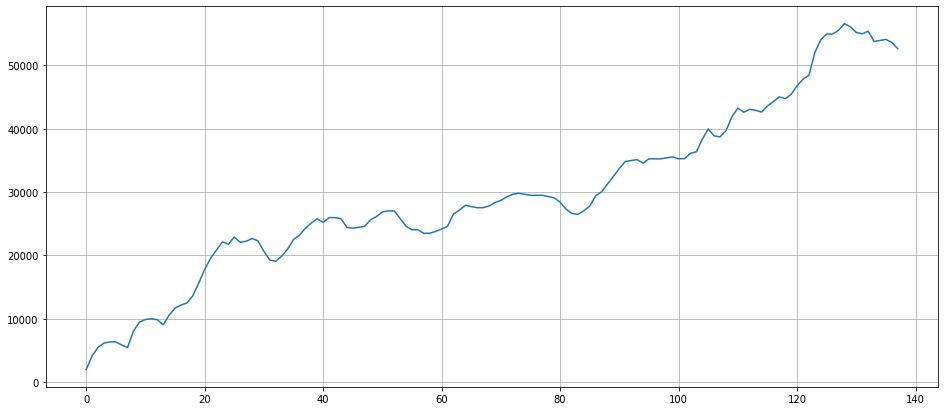

In [11]:

select_frame = trade_history_frame[trade_history_frame['ticker_head']=='ED']
select_frame2 =select_frame[(select_frame['q_inital']>=69)]

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
select_trades = select_frame2
plt.plot(range(len(select_trades)),select_trades['pnl_total'].cumsum())
plt.grid()
plt.show()

In [ ]:
# Holding Time And Profitability

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
select_trades = trade_history_frame
plt.scatter(select_trades['front_tr_dte'],select_trades['pnl_total'])
plt.grid()
plt.show()

In [50]:
import contract_utilities.contract_meta_info as cmi
ticker_head_risk_dict1 = {x + '_long': 0 for x in cmi.futures_butterfly_strategy_tickerhead_list}
ticker_head_risk_dict2 = {x + '_short': 0 for x in cmi.futures_butterfly_strategy_tickerhead_list}
ticker_head_risk_dict1.update(ticker_head_risk_dict2)
ticker_head_risk_dict1

{'LN_long': 0,
 'LC_long': 0,
 'FC_long': 0,
 'C_long': 0,
 'S_long': 0,
 'SM_long': 0,
 'BO_long': 0,
 'W_long': 0,
 'KW_long': 0,
 'SB_long': 0,
 'KC_long': 0,
 'CC_long': 0,
 'CT_long': 0,
 'OJ_long': 0,
 'CL_long': 0,
 'B_long': 0,
 'HO_long': 0,
 'RB_long': 0,
 'NG_long': 0,
 'ED_long': 0,
 'LN_short': 0,
 'LC_short': 0,
 'FC_short': 0,
 'C_short': 0,
 'S_short': 0,
 'SM_short': 0,
 'BO_short': 0,
 'W_short': 0,
 'KW_short': 0,
 'SB_short': 0,
 'KC_short': 0,
 'CC_short': 0,
 'CT_short': 0,
 'OJ_short': 0,
 'CL_short': 0,
 'B_short': 0,
 'HO_short': 0,
 'RB_short': 0,
 'NG_short': 0,
 'ED_short': 0}